[View in Colaboratory](https://colab.research.google.com/github/wenpinn/keras_mnit/blob/master/mnist.ipynb)

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)


Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [3]:
(X_train_image,Y_train_label),(X_test_image,Y_test_label)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(X_train_image.shape)
print(X_train_image[0:2])
print('label:',Y_train_label.shape)
print(Y_train_label[0:5])

(60000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
label: (60000,)
[5 0 4 1 9]


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig=plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image,cmap='binary')
  plt.show()


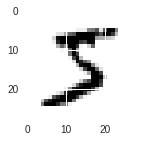

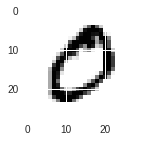

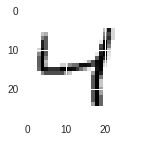

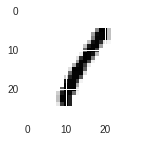

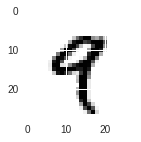

In [6]:
for x in range(0,5):
  plot_image(X_train_image[x])

In [0]:
#retrieve feature
X_train=X_train_image.reshape(60000,28*28).astype('float32')
X_test=X_test_image.reshape(10000,28*28).astype('float32')
#normailization 0~1
X_train_normalization=X_train/255
X_test_normalization=X_test/255

In [0]:
#one hot encoding : 2 -> 0 0 1 0 0 0 0 0 0 0
Y_train_onehot=np_utils.to_categorical(Y_train_label)
Y_test_onehot=np_utils.to_categorical(Y_test_label)


In [0]:
#MLP
#Model build
from keras.models import Sequential
from keras.layers import Dense


In [0]:
model=Sequential()

In [0]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [0]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))          

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
#define training method
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
#start to training
train_history=model.fit(x=X_train_normalization,
                       y=Y_train_onehot,
                       validation_split=0.2,  #80% train 20% test
                       epochs=10,
                       batch_size=200,
                       verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 7.8939e-04 - acc: 1.0000 - val_loss: 0.0857 - val_acc: 0.9796
Epoch 2/10
 - 2s - loss: 0.0033 - acc: 0.9993 - val_loss: 0.1321 - val_acc: 0.9692
Epoch 3/10
 - 2s - loss: 0.0217 - acc: 0.9924 - val_loss: 0.1001 - val_acc: 0.9771
Epoch 4/10
 - 2s - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0921 - val_acc: 0.9798
Epoch 5/10
 - 2s - loss: 9.7068e-04 - acc: 1.0000 - val_loss: 0.0907 - val_acc: 0.9794
Epoch 6/10
 - 2s - loss: 5.5825e-04 - acc: 1.0000 - val_loss: 0.0897 - val_acc: 0.9803
Epoch 7/10
 - 2s - loss: 4.7874e-04 - acc: 1.0000 - val_loss: 0.0905 - val_acc: 0.9798
Epoch 8/10
 - 2s - loss: 4.1037e-04 - acc: 1.0000 - val_loss: 0.0912 - val_acc: 0.9799
Epoch 9/10
 - 2s - loss: 3.7384e-04 - acc: 1.0000 - val_loss: 0.0915 - val_acc: 0.9799
Epoch 10/10
 - 2s - loss: 3.3925e-04 - acc: 1.0000 - val_loss: 0.0918 - val_acc: 0.9801


In [44]:
Y_testOneHot=np_utils.to_categorical(Y_test_label)
score=model.evaluate(X_test_normalization,Y_testOneHot)
print('prec:',score[1]*100,'%')

10000/10000 [==============================] - 0s 42us/step
prec: 98.16 %


In [48]:
#confusion matrix
prediction=model.predict_classes(X_test)
pd.crosstab(Y_test_label,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,2,1,1,0,1,1,2,0
1,0,1124,4,1,0,1,2,1,2,0
2,4,1,1012,2,1,0,3,5,4,0
3,0,0,2,999,0,3,0,3,2,1
4,1,0,4,1,962,0,2,3,0,9
5,2,0,0,16,1,862,4,2,2,3
6,5,2,0,1,2,5,942,1,0,0
7,1,5,8,2,0,0,0,1005,2,5
8,4,0,3,10,3,3,2,4,943,2


In [51]:
#data frame 
df=pd.DataFrame({'label':Y_test_label,'predict':prediction})
print(df.shape)
print(df[:10])


(10000, 2)
   label  predict
0      7        7
1      2        2
2      1        1
3      0        0
4      4        4
5      1        1
6      4        4
7      9        9
8      5        5
9      9        9


In [57]:
df_8to3=df[(df.label==8) & (df.predict==3)]
print(df_8to3)

      label  predict
1319      8        3
1878      8        3
2004      8        3
3062      8        3
3757      8        3
4123      8        3
4807      8        3
4890      8        3
6024      8        3
6755      8        3


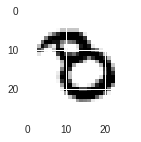

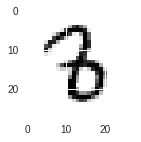

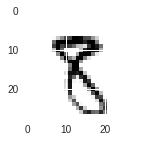

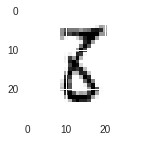

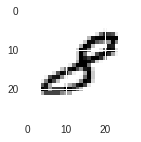

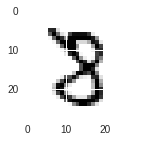

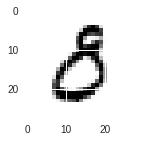

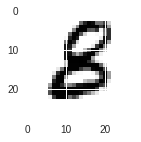

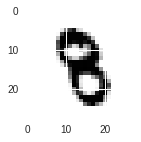

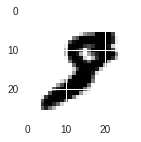

In [61]:
for i in df_8to3.index:
  plot_image(X_test_image[i])